In [2]:
import pandas as pd
import yaml
import os
import re

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/2431548157.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def process_csv_files(yaml_file):
    # Load the YAML file
    with open(yaml_file, 'r') as file:
        csv_file_paths = yaml.safe_load(file)['csv_files']

    all_dataframes = []

    for file_info in csv_file_paths:
        file_path = file_info['name']

        # Extract the name from the file path
        filename = os.path.basename(file_path)
        name_match = re.search(r"_([A-Za-z0-9]+)_\d{4}_\d{2}_\d{2}\.csv", filename)
        if name_match:
            name_suffix = name_match.group(1)
        else:
            name_suffix = 'Unknown'

        # Load CSV file
        df = pd.read_csv(file_path)

        # Convert 'dateTime' to datetime and set as index
        df['dateTime'] = pd.to_datetime(df['dateTime'])
        df.set_index('dateTime', inplace=True)

        # Keep only numerical columns
        numerical_cols = df.select_dtypes(include=['number']).columns

        # Rename numerical columns by appending the extracted name
        df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{name_suffix}")

        # Drop rows with NaN values in numerical columns
        df_numerical.dropna(inplace=True)

        # Resample and average each DataFrame at 10-second intervals
        df_resampled = df_numerical.resample('10S').mean()

        # Collect all resampled dataframes
        all_dataframes.append(df_resampled)

    # Concatenate all dataframes along columns
    combined_dataframe = pd.concat(all_dataframes, axis=1)

    return combined_dataframe


yaml_file = '/Users/matthewlary/Desktop/MintsData/SensorData.yaml'
process_csv_files(yaml_file)

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/1830080973.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/1830080973.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/1830080973.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/1830080973.py:36: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417

,luminance_APDS9002,voltage_APDS9002,raw_APDS9002,temperature_BME280,pressure_BME280,humidity_BME280,altitude_BME280,temperature_BME680,pressure_BME680,humidity_BME680,...,WTUnits_WIMDA,relativeHumidity_WIMDA,absoluteHumidity_WIMDA,dewPoint_WIMDA,windDirectionTrue_WIMDA,windDirectionMagnetic_WIMDA,windSpeedKnots_WIMDA,windSpeedMetersPerSecond_WIMDA,pitch_YXXDR,roll_YXXDR
dateTime,,,,,,,,,,,,,,,,,,,,,
2023-07-30 00:00:10,59.65,0.21,43.0,40.00,100096.0,28.0,102.81,40.32,100.07,30.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,0.30
2023-07-30 00:00:20,57.41,0.20,41.0,39.93,100096.0,28.0,102.81,40.32,100.07,30.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.60,0.10
2023-07-30 00:00:30,56.29,0.20,40.0,39.91,100093.0,29.0,103.06,40.30,100.06,30.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.20
2023-07-30 00:00:40,57.41,0.20,41.0,39.93,100092.0,29.0,103.15,40.33,100.06,30.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.75
2023-07-30 00:00:50,57.41,0.20,41.0,39.91,100097.0,28.0,102.73,40.32,100.07,30.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-30 23:59:20,54.05,0.19,38.0,42.10,100020.0,24.0,109.20,42.23,99.98,26.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.85,0.40
2023-07-30 23:59:30,55.17,0.19,39.0,42.06,100017.0,23.0,109.46,42.21,99.98,26.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.40
2023-07-30 23:59:40,55.17,0.19,39.0,42.05,100017.0,24.0,109.46,42.19,99.98,26.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,0.40


In [5]:
import pandas as pd
import yaml
import os

def process_csv_files(yaml_file):
    with open(yaml_file, 'r') as file:
        yaml_data = yaml.safe_load(file)

    node_ids = yaml_data['node_ids']
    sensor_ids = yaml_data['sensor_ids']

    base_path = "/Users/mlary/Desktop/sensorData/MINTS_"
    date_suffix = "2023_07_30.csv"  # Change this if the dates vary
    all_dataframes = []

    for node_id in node_ids:
        for sensor_id in sensor_ids:
            file_path = f"{base_path}{node_id}_{sensor_id}_{date_suffix}"
            print(f"Checking file: {file_path}")  # Debugging line

            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")  # Debugging line
                continue

            df = pd.read_csv(file_path)
            df['dateTime'] = pd.to_datetime(df['dateTime'])
            df.set_index('dateTime', inplace=True)
            numerical_cols = df.select_dtypes(include=['number']).columns
            df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{sensor_id}")
            df_numerical.dropna(inplace=True)
            df_resampled = df_numerical.resample('10S').mean()
            all_dataframes.append(df_resampled)

    if not all_dataframes:
        print("No dataframes to concatenate")  # Debugging line
        return pd.DataFrame()

    combined_dataframe = pd.concat(all_dataframes, axis=1)
    return combined_dataframe

# Usage
yaml_file = '/Users/matthewlary/Desktop/Programming/Repos/sensor_calibration/SensorDataV2.yaml'  # Update with the correct path
combined_data = process_csv_files(yaml_file)


Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_IPS7100_2023_07_30.csv
File not found: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_IPS7100_2023_07_30.csv
Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_WIMDA_2023_07_30.csv
File not found: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_WIMDA_2023_07_30.csv
Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_GPSGPGGA2_2023_07_30.csv
File not found: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_GPSGPGGA2_2023_07_30.csv
Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_SEN0232_2023_07_30.csv
File not found: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_SEN0232_2023_07_30.csv
Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_LIBRAD_2023_07_30.csv
File not found: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_LIBRAD_2023_07_30.csv
Checking file: /Users/mlary/Desktop/sensorData/MINTS_001e0636e547_GPSGPRMC2_2023_07_30.csv
File not found: 

/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/2068761951.py:42: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/2068761951.py:42: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/2068761951.py:42: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417/2068761951.py:42: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = df_numerical.resample('10S').mean()
/var/folders/y7/_39t7j0n667f6p1cmsg_0b9c0000gn/T/ipykernel_53417

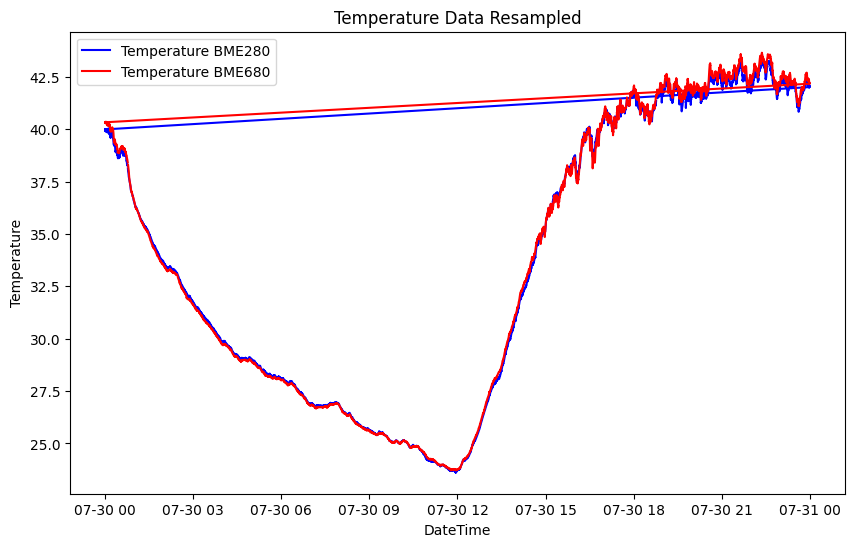

In [6]:
import matplotlib.pyplot as plt
import yaml
import os
import pandas as pd
import re

def process_csv_files(yaml_file):
    # Load the YAML file
    with open(yaml_file, 'r') as file:
        csv_file_paths = yaml.safe_load(file)['csv_files']

    all_dataframes = []

    for file_info in csv_file_paths:
        file_path = file_info['name']

        # Extract the name from the file path
        filename = os.path.basename(file_path)
        name_match = re.search(r"_([A-Za-z0-9]+)_\d{4}_\d{2}_\d{2}\.csv", filename)
        if name_match:
            name_suffix = name_match.group(1)
        else:
            name_suffix = 'Unknown'

        # Load CSV file
        df = pd.read_csv(file_path)

        # Convert 'dateTime' to datetime and set as index
        df['dateTime'] = pd.to_datetime(df['dateTime'])
        df.set_index('dateTime', inplace=True)

        # Keep only numerical columns
        numerical_cols = df.select_dtypes(include=['number']).columns

        # Rename numerical columns by appending the extracted name
        df_numerical = df[numerical_cols].rename(columns=lambda x: f"{x}_{name_suffix}")

        # Drop rows with NaN values in numerical columns
        df_numerical.dropna(inplace=True)

        # Resample and average each DataFrame at 10-second intervals
        df_resampled = df_numerical.resample('10S').mean()

        # Collect all resampled dataframes
        all_dataframes.append(df_resampled)

    # Concatenate all dataframes along columns
    combined_dataframe = pd.concat(all_dataframes, axis=1)

    return combined_dataframe

# Path to the YAML file
yaml_file = '/Users/matthewlary/Desktop/MintsData/SensorData.yaml'

# Process the CSV files and get the combined dataframe
combined_dataframe = process_csv_files(yaml_file)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME280'], label='Temperature BME280', color='blue')
plt.plot(combined_dataframe.index, combined_dataframe['temperature_BME680'], label='Temperature BME680', color='red')
plt.xlabel('DateTime')
plt.ylabel('Temperature')
plt.title('Temperature Data Resampled')
plt.legend()
plt.show()
